# Semester Project: Endangered Species Across the United States

### Loading Packages and Datasets

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

In [2]:
parks = pd.read_csv(r"C:\Users\datre\OneDrive\Documents\Graduate School\Winter '20\parks.csv")
species = pd.read_csv(r"C:\Users\datre\OneDrive\Documents\Graduate School\Winter '20\species.csv")

C:\Users\datre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Data Wrangling

In [3]:
print(parks.shape)
parks.head(3)

(56, 6)


,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50


In [4]:
print(species.shape)
species.head(3)

(119248, 14)


,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN


In [5]:
sp = pd.merge(parks, species, on="Park Name")
print(sp.shape)
sp.head()

(119248, 19)


,Park Code,Park Name,State,Acres,Latitude,Longitude,Species ID,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,ACAD-1000,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD,Acadia National Park,ME,47390,44.35,-68.21,ACAD-1001,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD,Acadia National Park,ME,47390,44.35,-68.21,ACAD-1002,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD,Acadia National Park,ME,47390,44.35,-68.21,ACAD-1003,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD,Acadia National Park,ME,47390,44.35,-68.21,ACAD-1004,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [6]:
sp_danger = sp[sp["Conservation Status"].isin(["Endangered", "Threatened","In Recovery", "Species of Concern"])]
print(sp_danger.shape)
sp_danger.head(3)

(4478, 19)


,Park Code,Park Name,State,Acres,Latitude,Longitude,Species ID,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
2,ACAD,Acadia National Park,ME,47390,44.35,-68.21,ACAD-1002,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD,Acadia National Park,ME,47390,44.35,-68.21,ACAD-1003,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
20,ACAD,Acadia National Park,ME,47390,44.35,-68.21,ACAD-1020,Mammal,Chiroptera,Vespertilionidae,Eptesicus fuscus,"Big Brown Bat, Common Brown Bat",Approved,Present,Native,Uncommon,NaN,Species of Concern,NaN


For consistency, I chose the conservation status rows that have a definite label, versus NaN or proposed labels.

In [7]:
sp_danger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4478 entries, 2 to 118992
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Park Code            4478 non-null   object 
 1   Park Name            4478 non-null   object 
 2   State                4478 non-null   object 
 3   Acres                4478 non-null   int64  
 4   Latitude             4478 non-null   float64
 5   Longitude            4478 non-null   float64
 6   Species ID           4478 non-null   object 
 7   Category             4478 non-null   object 
 8   Order                4473 non-null   object 
 9   Family               4473 non-null   object 
 10  Scientific Name      4478 non-null   object 
 11  Common Names         4478 non-null   object 
 12  Record Status        4478 non-null   object 
 13  Occurrence           4254 non-null   object 
 14  Nativeness           4218 non-null   object 
 15  Abundance            3427 non-null  

Off of knowledge, features we will not need in the project include: Park Code, Species ID, Order, Family, Common Names, Record Status, Seasonality, and Unnammed: 13.

In [92]:
sp = sp_danger[["Park Name", "State", "Acres", "Latitude", "Longitude", "Category", "Occurrence", "Nativeness", "Conservation Status"]]
sp

,Park Name,State,Acres,Latitude,Longitude,Category,Occurrence,Nativeness,Conservation Status
2,Acadia National Park,ME,47390,44.35,-68.21,Mammal,Present,Not Native,Species of Concern
3,Acadia National Park,ME,47390,44.35,-68.21,Mammal,Not Confirmed,Native,Endangered
20,Acadia National Park,ME,47390,44.35,-68.21,Mammal,Present,Native,Species of Concern
21,Acadia National Park,ME,47390,44.35,-68.21,Mammal,Present,Native,Species of Concern
24,Acadia National Park,ME,47390,44.35,-68.21,Mammal,Present,Native,Species of Concern
...,...,...,...,...,...,...,...,...,...
118628,Zion National Park,UT,146598,37.30,-113.05,Vascular Plant,Not Present (False Report),Native,Species of Concern
118840,Zion National Park,UT,146598,37.30,-113.05,Vascular Plant,Present,Native,Species of Concern
118855,Zion National Park,UT,146598,37.30,-113.05,Vascular Plant,Present,Native,Species of Concern
118894,Zion National Park,UT,146598,37.30,-113.05,Vascular Plant,Present,Native,Species of Concern


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

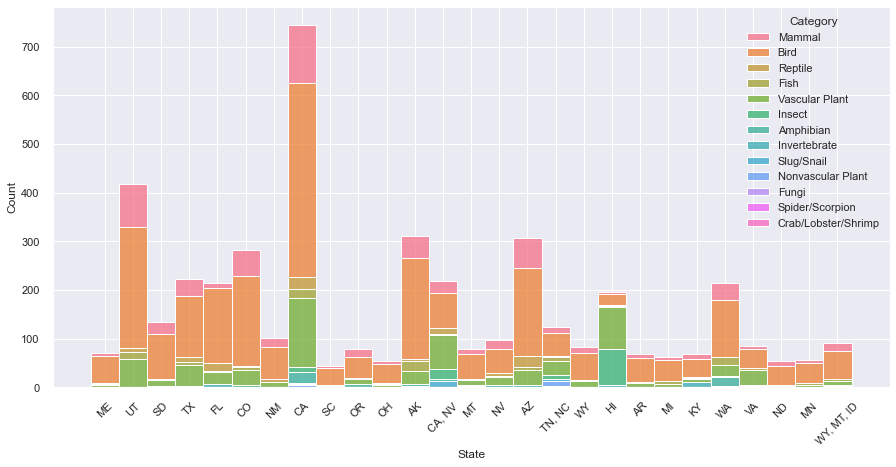

In [90]:
sns.set(style = "darkgrid")
sns.set_palette("hls", 3)
plt.figure(figsize=(15,7))
g1 = sns.histplot(data = sp_danger, x = "State", hue = "Category", multiple = "stack")
plt.setp(g1.get_xticklabels(), rotation=45)

In [85]:
end = sp[sp["Conservation Status"].isin(["Endangered"])]
threat = sp[sp["Conservation Status"].isin(["Threatened"])]
recov = sp[sp["Conservation Status"].isin(["In Recovery"])]
SOC = sp[sp["Conservation Status"].isin(["Species of Concern"])]

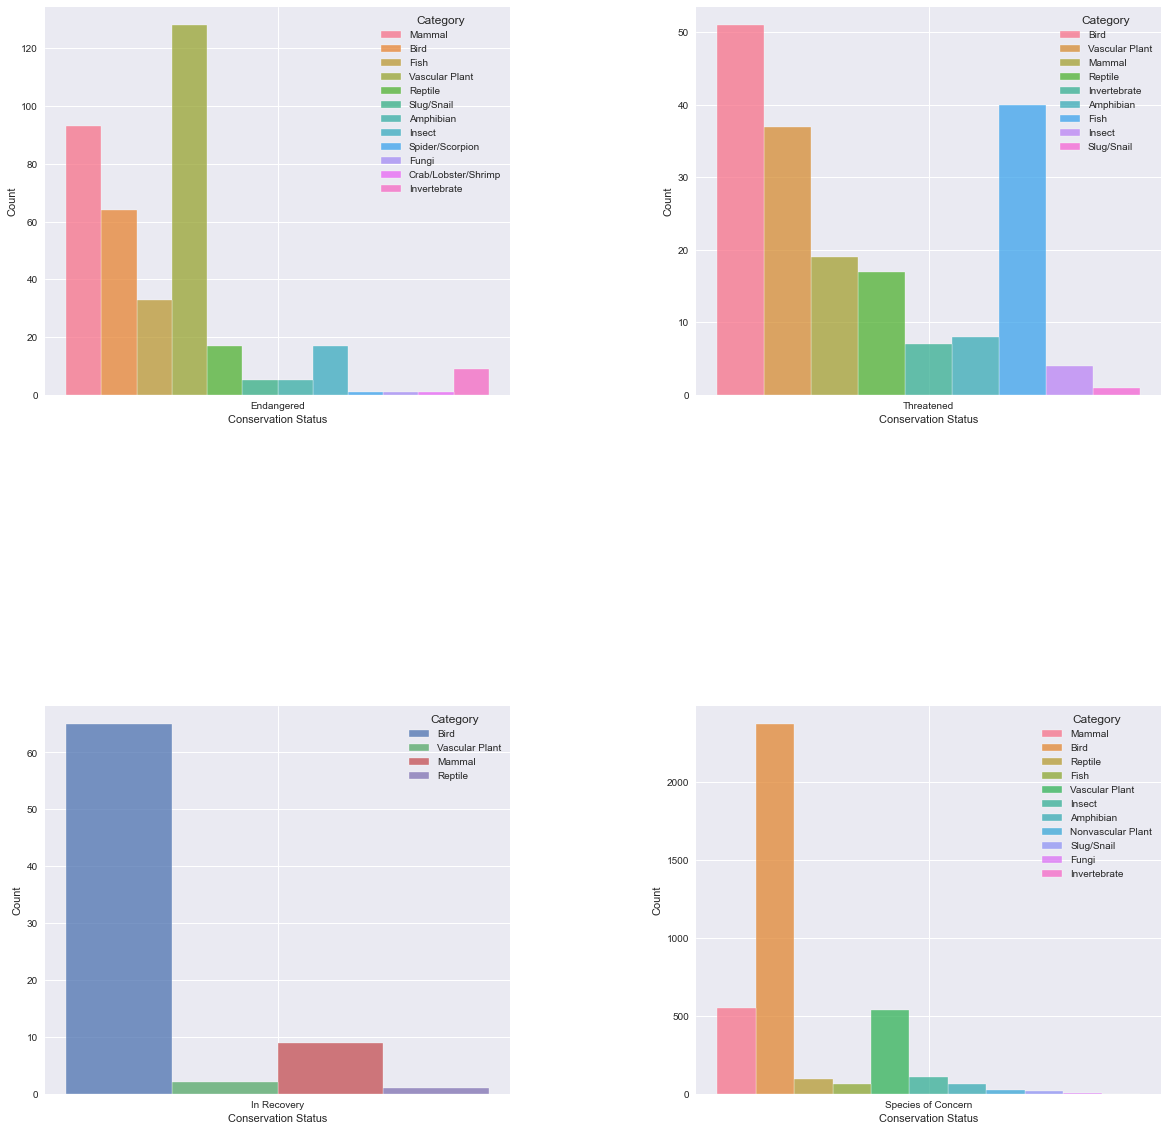

In [89]:
sns.set_palette("hls", 3)
plt.style.use('seaborn')
fig, axis = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(20,20)
fig.subplots_adjust(wspace = 0.4, hspace = 0.8)

# plot 1
h1 = sns.histplot(data = end, x = "Conservation Status", hue = "Category", multiple = "dodge", ax = axis[0,0])
h2 = sns.histplot(data = threat, x = "Conservation Status", hue = "Category", multiple = "dodge", ax = axis[0,1])
h3 = sns.histplot(data = recov, x = "Conservation Status", hue = "Category", multiple = "dodge", ax = axis[1,0])
h4 = sns.histplot(data = SOC, x = "Conservation Status", hue = "Category", multiple = "dodge", ax = axis[1,1])

#### Correlation and Heat Map

##### One-Hot Encoding

In [93]:
sp1 = sp.copy()

In [94]:
for column in ["Category", "Nativeness"]:
    dummies = pd.get_dummies(sp1[column])
    sp1[dummies.columns] = dummies

In [95]:
for col in sp1.columns:
    print(col, ":", len(sp1[col].unique()), "labels")

Park Name : 56 labels
State : 27 labels
Acres : 55 labels
Latitude : 53 labels
Longitude : 55 labels
Category : 13 labels
Occurrence : 6 labels
Nativeness : 4 labels
Conservation Status : 4 labels
Amphibian : 2 labels
Bird : 2 labels
Crab/Lobster/Shrimp : 2 labels
Fish : 2 labels
Fungi : 2 labels
Insect : 2 labels
Invertebrate : 2 labels
Mammal : 2 labels
Nonvascular Plant : 2 labels
Reptile : 2 labels
Slug/Snail : 2 labels
Spider/Scorpion : 2 labels
Vascular Plant : 2 labels
Native : 2 labels
Not Native : 2 labels
Unknown : 2 labels


In [12]:
sp1.head(3)

,Park Name,State,Acres,Latitude,Longitude,Category,Occurrence,Nativeness,Conservation Status,Amphibian,...,Slug/Snail,Spider/Scorpion,Vascular Plant,Endangered,In Recovery,Species of Concern,Threatened,Native,Not Native,Unknown
2,Acadia National Park,ME,47390,44.35,-68.21,Mammal,Present,Not Native,Species of Concern,0,...,0,0,0,0,0,1,0,0,1,0
3,Acadia National Park,ME,47390,44.35,-68.21,Mammal,Not Confirmed,Native,Endangered,0,...,0,0,0,1,0,0,0,1,0,0
20,Acadia National Park,ME,47390,44.35,-68.21,Mammal,Present,Native,Species of Concern,0,...,0,0,0,0,0,1,0,1,0,0


In [13]:
sp1 = sp1.drop(["Category", "Nativeness", "Occurrence"], axis = 1)
sp1.head(3)

,Park Name,State,Acres,Latitude,Longitude,Amphibian,Bird,Crab/Lobster/Shrimp,Fish,Fungi,...,Slug/Snail,Spider/Scorpion,Vascular Plant,Endangered,In Recovery,Species of Concern,Threatened,Native,Not Native,Unknown
2,Acadia National Park,ME,47390,44.35,-68.21,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,Acadia National Park,ME,47390,44.35,-68.21,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
20,Acadia National Park,ME,47390,44.35,-68.21,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [96]:
sp_corr = sp1.copy()
label_encoder = LabelEncoder()
sp_corr["Park Name"] = label_encoder.fit_transform(sp_corr["Park Name"])
sp_corr["State"] = label_encoder.fit_transform(sp_corr["State"])
sp_corr["Conservation Status"] = label_encoder.fit_transform(sp_corr["Conservation Status"])

In [97]:
corr_matrix = sp_corr.corr()
corr_matrix

,Park Name,State,Acres,Latitude,Longitude,Conservation Status,Amphibian,Bird,Crab/Lobster/Shrimp,Fish,...,Invertebrate,Mammal,Nonvascular Plant,Reptile,Slug/Snail,Spider/Scorpion,Vascular Plant,Native,Not Native,Unknown
Park Name,1.000000,-0.111757,-0.012628,0.227961,-0.189064,0.028289,0.051610,-0.005474,0.009141,0.013780,...,-0.001527,0.026259,0.019621,-0.019615,-0.022755,-0.001883,-0.036952,0.000753,-0.037980,0.043953
State,-0.111757,1.000000,-0.288115,-0.004090,0.308933,0.080314,0.015107,0.013818,-0.004797,0.025182,...,-0.027820,0.024837,0.046635,-0.042112,-0.019977,0.016014,-0.017459,0.097603,-0.053411,-0.039632
Acres,-0.012628,-0.288115,1.000000,0.382716,-0.327344,0.001823,0.008941,-0.039306,-0.007916,0.025835,...,-0.031545,-0.025839,-0.012152,0.010408,0.069785,-0.003159,0.036893,-0.105499,-0.041709,-0.035695
Latitude,0.227961,-0.004090,0.382716,1.000000,-0.250196,0.135262,0.044278,0.127081,-0.002739,0.095829,...,-0.043933,0.042490,0.022015,-0.070895,-0.043225,-0.005235,-0.134650,0.029234,-0.045026,0.018379
Longitude,-0.189064,0.308933,-0.327344,-0.250196,1.000000,0.106659,-0.042402,0.128564,0.019785,-0.021016,...,0.080425,-0.004308,0.046666,0.035440,-0.030691,0.021764,-0.079653,-0.077660,0.079238,0.061806
Conservation Status,0.028289,0.080314,0.001823,0.135262,0.106659,1.000000,0.024683,0.165054,-0.045508,-0.012887,...,-0.051012,-0.081636,0.018282,0.002240,-0.024291,-0.045508,-0.120953,0.058418,0.009461,-0.020874
Amphibian,0.051610,0.015107,0.008941,0.044278,-0.042402,0.024683,1.000000,-0.149144,-0.001937,-0.023201,...,-0.008002,-0.054516,-0.010096,-0.022679,-0.010096,-0.001937,-0.055986,-0.005554,-0.019186,-0.001380
Bird,-0.005474,0.013818,-0.039306,0.127081,0.128564,0.165054,-0.149144,1.000000,-0.017196,-0.205933,...,-0.071027,-0.483888,-0.089612,-0.201301,-0.089612,-0.017196,-0.496935,0.158619,0.013425,-0.006709
Crab/Lobster/Shrimp,0.009141,-0.004797,-0.007916,-0.002739,0.019785,-0.045508,-0.001937,-0.017196,1.000000,-0.002675,...,-0.000923,-0.006285,-0.001164,-0.002615,-0.001164,-0.000223,-0.006455,-0.042883,-0.002212,-0.002574
Fish,0.013780,0.025182,0.025835,0.095829,-0.021016,-0.012887,-0.023201,-0.205933,-0.002675,1.000000,...,-0.011049,-0.075274,-0.013940,-0.031314,-0.013940,-0.002675,-0.077303,-0.045351,0.115751,0.015364


In [98]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

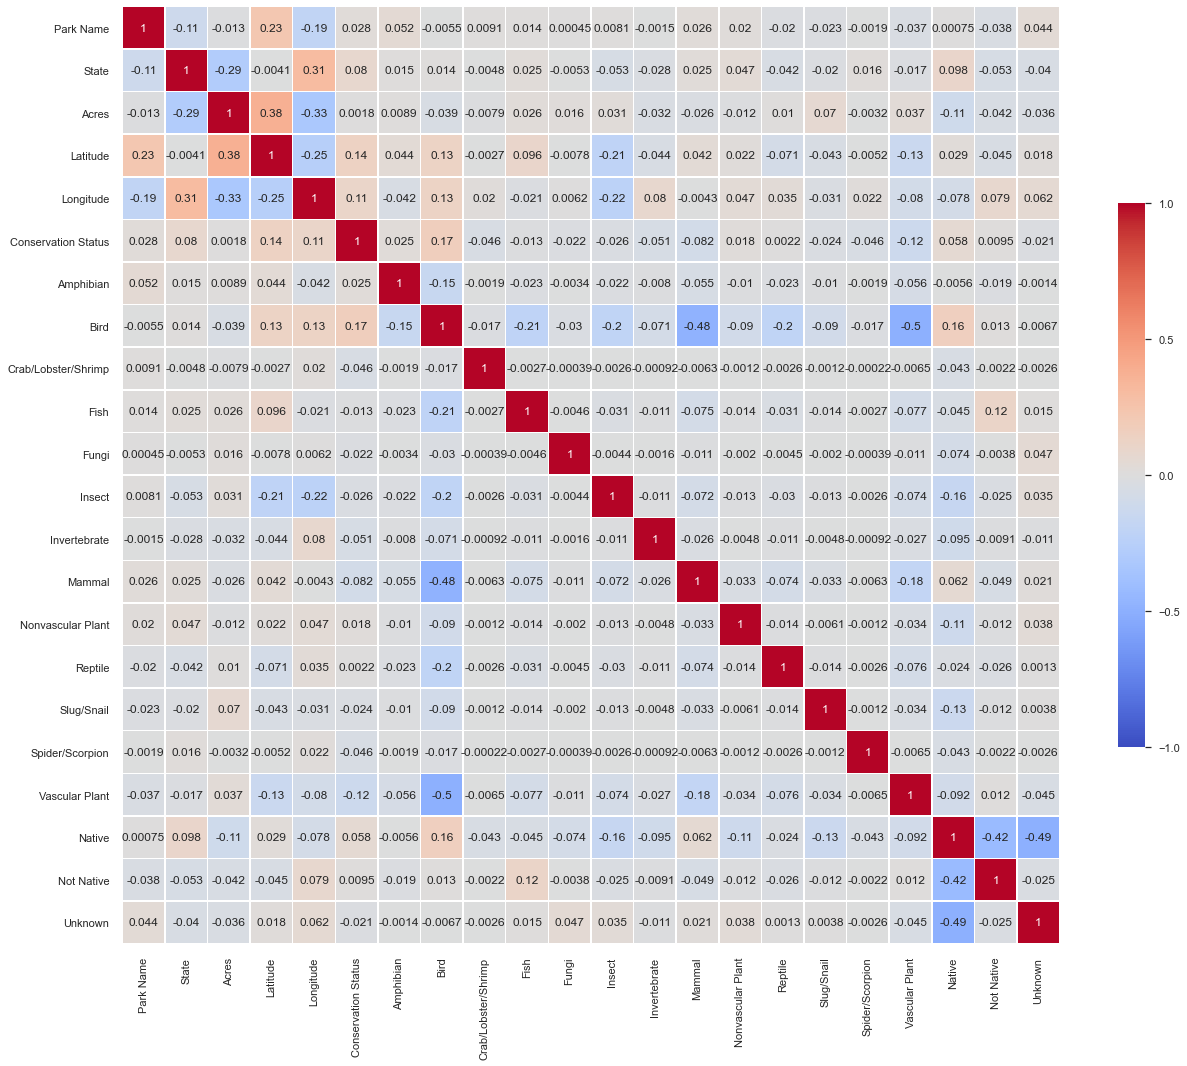

In [99]:
f, ax = plt.subplots(figsize=(21,25)) 
heatmap = sns.heatmap(corr_matrix,
                      square = True,
                      linewidths = .5,
                      cmap = "coolwarm",
                      cbar_kws = {"shrink": .4, 
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#### Chi-Squared Test

##### H0: Two variables are independent

##### HA: Two variables are not indenpendent

In [70]:
sp_cs = sp.copy()
sp_cs.head(3)

,Park Name,State,Acres,Latitude,Longitude,Category,Occurrence,Nativeness,Conservation Status
2,Acadia National Park,ME,47390,44.35,-68.21,Mammal,Present,Not Native,Species of Concern
3,Acadia National Park,ME,47390,44.35,-68.21,Mammal,Not Confirmed,Native,Endangered
20,Acadia National Park,ME,47390,44.35,-68.21,Mammal,Present,Native,Species of Concern


In [71]:
label_encoder = LabelEncoder()
sp_cs["Park Name"] = label_encoder.fit_transform(sp_cs["Park Name"])
sp_cs["State"] = label_encoder.fit_transform(sp_cs["State"])
sp_cs["Conservation Status"] = label_encoder.fit_transform(sp_cs["Conservation Status"])

In [73]:
for column in ["Category", "Nativeness"]:
    dummies = pd.get_dummies(sp_cs[column])
    sp_cs[dummies.columns] = dummies

In [74]:
sp_cs = sp_cs.drop(["Latitude", "Longitude", "Occurrence", "Category", "Nativeness"], axis = 1)

In [75]:
sp_cs.head(3)

,Park Name,State,Acres,Conservation Status,Amphibian,Bird,Crab/Lobster/Shrimp,Fish,Fungi,Insect,Invertebrate,Mammal,Nonvascular Plant,Reptile,Slug/Snail,Spider/Scorpion,Vascular Plant,Native,Not Native,Unknown
2,0,9,47390,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,9,47390,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
20,0,9,47390,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [76]:
X = sp_cs.drop("Conservation Status",axis=1)
y = sp_cs["Conservation Status"]

In [77]:
chi_scores = chi2(X,y)
chi_scores

(array([4.66406416e+01, 2.39688979e+02, 1.21409893e+07, 9.68564916e+00,
        1.57187758e+02, 1.09732620e+01, 2.71458839e+02, 2.54473467e+00,
        6.30035306e+00, 1.10265314e+02, 2.84932001e+01, 4.46135831e+00,
        3.04791781e+01, 4.01990221e+00, 1.09732620e+01, 9.96045964e+01,
        9.44775324e+00, 1.42196182e+01, 5.67884800e+00]),
 array([4.14442865e-10, 1.11112871e-51, 0.00000000e+00, 2.14362146e-02,
        7.41307802e-34, 1.18713400e-02, 1.49226269e-58, 4.67260746e-01,
        9.78775041e-02, 9.62137895e-24, 2.86154886e-06, 2.15763044e-01,
        1.09415314e-06, 2.59323055e-01, 1.18713400e-02, 1.89022191e-21,
        2.38937234e-02, 2.62095610e-03, 1.28324360e-01]))

In [78]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

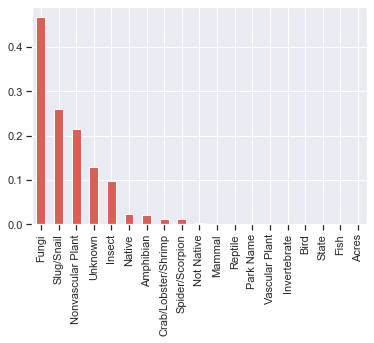

In [79]:
p_values.plot.bar()

Since Insect, Unknown, Nonvascular Plant, Slug/Snail, and Fungi have high p-values (above 0.05), they should be removed since they are independent of Conservation Status.